# 虚谷物联之复合数据绘图

## 1. 范例说明

复合数据，即彼此关联的数据，放在一个消息主题（topicID）中。在物联网应用中，尤其是物联网数据采集中，很多数据是相互关联的。如果分散在不同的topicID中，给观察和研究都带来不便。如校园气象信息项目中，温湿度数据、光照数据等等都是彼此关联的。在虚谷物联项目中，我们称这类数据为复合数据。

与复合数据对应的，就是常规的单一数据了。因为SIoT的Web管理页面中本来就能呈现这种单一数据，用掌控板或者Mind+来绘制图表，都比较容易。该案例演示的就是如果在一个图表中，将多个数据同时绘制出来。

1）数据类型：2个数据，用“,”分开。

2）涉及材料：

    1）硬件：DH11传感器，由掌控板或者Arduino采集；
    2）软件：siot服务器，siot库、matplotlib库。
    
3）文档写作：谢作如

4）参考网站：https://github.com/vvlink/SIoT

5）其他说明：本作品范例可以移植到其他平台。因为虚谷号已经默认安装了siot库，也预装了siot服务器，使用虚谷号的用户可以省略这一步。

## 2. 代码编写

### 2.1 数据采集端

数据采集端指利用掌控板、Arduino或者虚谷号采集温湿度传感器的数据，发送到SIoT服务器。

TopicID名称为：xzr/101

数据格式：温度和湿度数据，用英文的逗号“,”分隔，如“22.1,88.0”。

### 2.2 数据呈现端

第一步：导入库

siot库是对mqtt库对二次封装，让代码更加简洁。

In [1]:
import siot

第二步：配置SIOT服务器

In [2]:
SERVER = "127.0.0.1"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_pubTopic  = 'xzr/100'   #“topic”为“项目名称/设备名称”
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码

说明：虚谷号可以用127.0.0.1表示本机，用户名和密码统一使用“scope”，topicid自己定义，这里用的是“xzr/100”，表示项目名称为“xzr”，设备名称为“100”。

第三步：连接SIOT服务器

In [3]:
siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord)
siot.connect()

第四步：设置回调函数，绘图

因为在jupyter上运行，为了能够动态显示图表，特意加了“display.clear_output(wait=True)”，如果直接运行.py文件，请删除如下几句：

    %matplotlib inline
    from IPython import display
    display.clear_output(wait=True)



In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
x,p1,p2=[],[],[]
i=0
w=20 #设置数据的长度
def draw(v1,v2):
    global x,i,p1,p2
    i=i+1
    x.append(i)
    p1.append(v1)
    p2.append(v2)
    # 当数据太多了开始删除，避免图表越来越小
    if len(x)>w:
        x.pop(0)
        p1.pop(0)
        p2.pop(0)
    fig = plt.figure()
    plt.plot(x,p1,color="red",linewidth=1)
    plt.plot(x,p2,color="blue",linewidth=1)
    display.clear_output(wait=True)
    plt.show()
    
def sub_cb(client, userdata, msg):
    print("\nTopic:" + str(msg.topic) + " Message:" + str(msg.payload))
    # msg.payload是bytes类型，要转换
    s=msg.payload.decode()
    ss=s.split(',')
    draw(ss[0],ss[1])

第五步：订阅消息

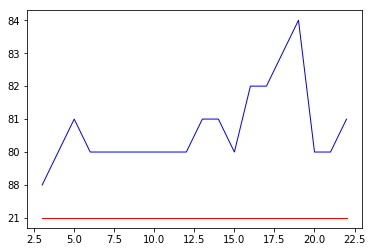

In [5]:
siot.subscribe(IOT_pubTopic, sub_cb)
siot.loop()

接下来，我们就能够看到动态刷新的数据了。

**注：重新运行程序的时候，需先选择上方“服务”->再选择“重启 & 清空输出”。**